In [5]:
%matplotlib inline

import os
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
import cv2
import random

import matplotlib.pyplot as plt

# \[ Hyundai Road Segmentation을 위한 데이터셋 - HyundaiDataset \]
---

In [6]:
from engine.config import ModelConfiguration
from engine.utils.dataset import MaskLabDataset, get_image_cases
from engine.utils.visualize import draw_instances, draw_semantics
from engine.utils.generator import MaskLabGenerator
from road_project.setup.process import process_dataset

## 1. 데이터셋 구성하기

In [3]:
config = ModelConfiguration()
DATA_DIR = "../road_project/datasets/"
config.dataset.data_dir = DATA_DIR

cases = get_image_cases(os.path.join(DATA_DIR,"images/"))
dataset = MaskLabDataset(cases,data_dir=DATA_DIR)

## 2. 데이터셋에서 데이터 가져오기

### (1) Single Data 가져오기

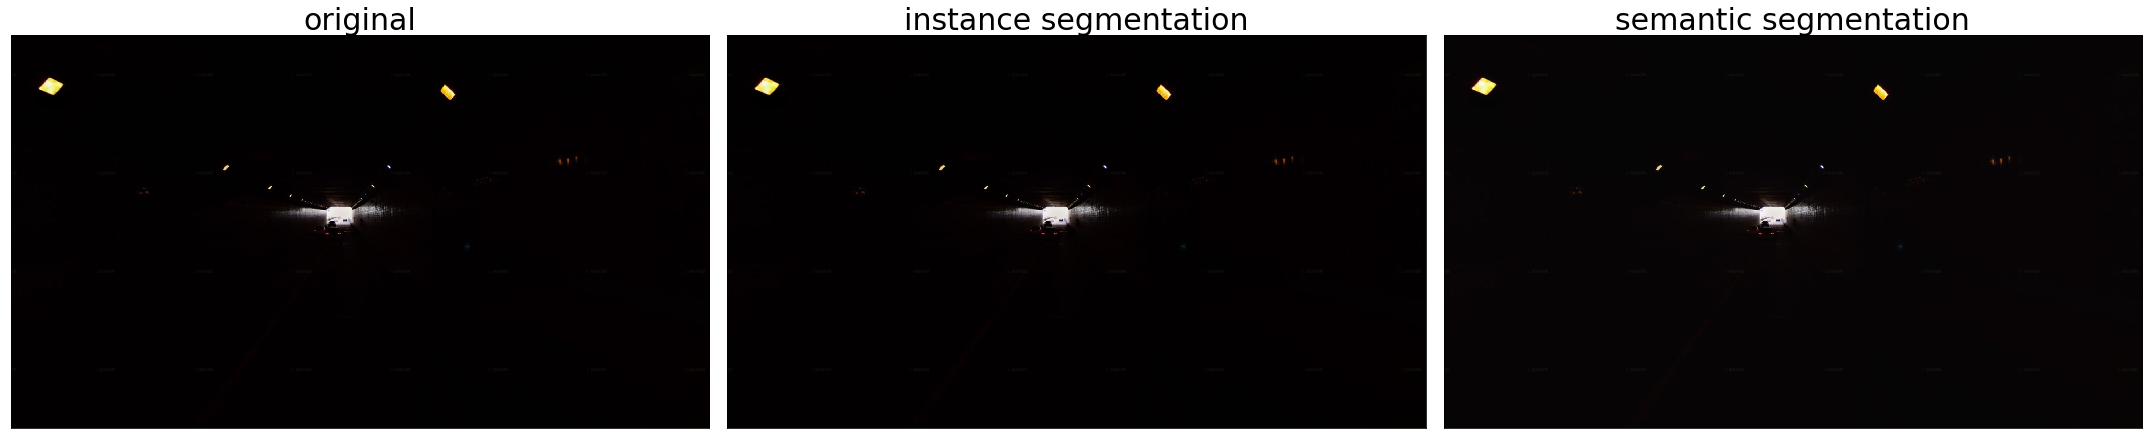

In [4]:
sample = dataset['A2_0177_02579.jpg']
images = sample['images']

semantics = sample["semantic"]
instances = sample['instance']
detections = sample['detection']

semantics_exist = sample['semantic_exist']
instances_exist = sample['instance_exist']

fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1,3,1)
ax.set_title('original',fontsize=30); ax.set_xticks([]); ax.set_yticks([]);
ax.imshow(images)

ax = fig.add_subplot(1,3,2)
ax.set_title('instance segmentation',fontsize=30); ax.set_xticks([]); ax.set_yticks([]);
ax.imshow(draw_instances(images, detections, instances))

ax = fig.add_subplot(1,3,3)
ax.set_title('semantic segmentation',fontsize=30); ax.set_xticks([]); ax.set_yticks([]);
ax.imshow(draw_semantics(images, semantics))

plt.tight_layout()
plt.show()

## (2) Multiple Data 가져오기

In [5]:
sample = dataset[6356:6359]
images = sample['images']

semantics = sample["semantic"]
instances = sample['instance']
detections = sample['detection']

semantics_exist = sample['semantic_exist']
instances_exist = sample['instance_exist']

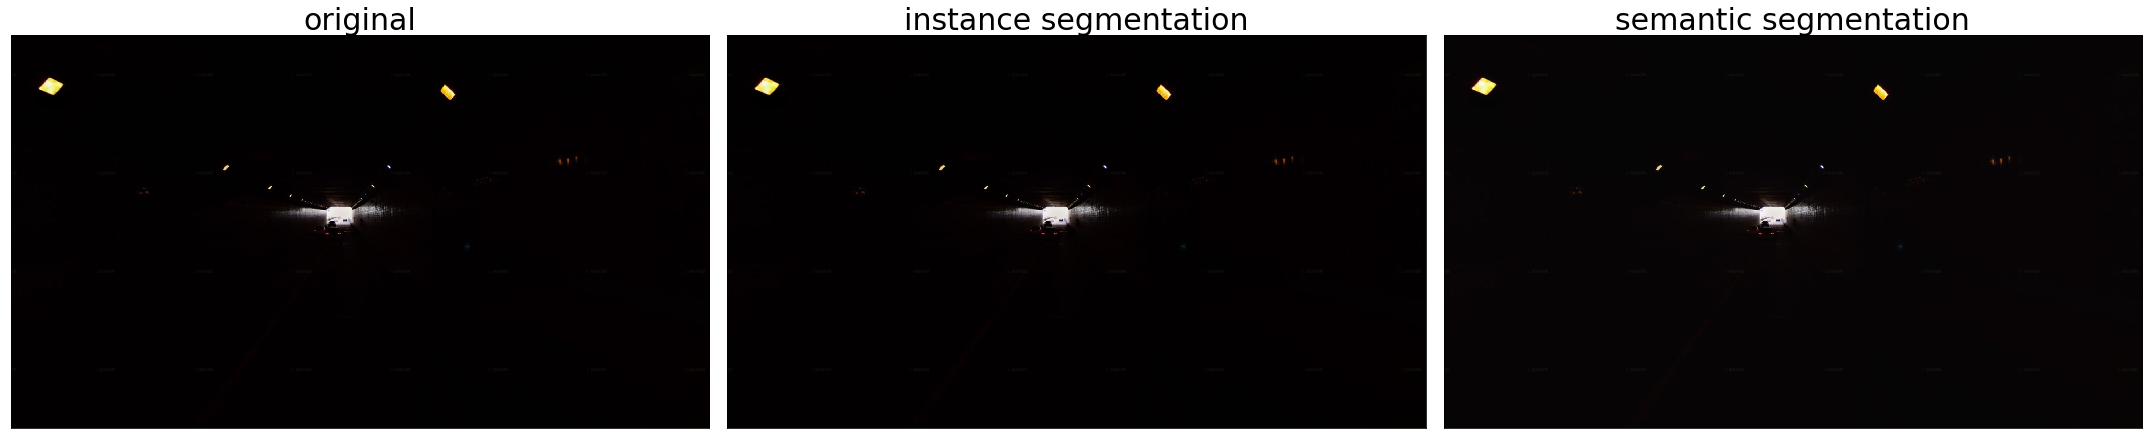

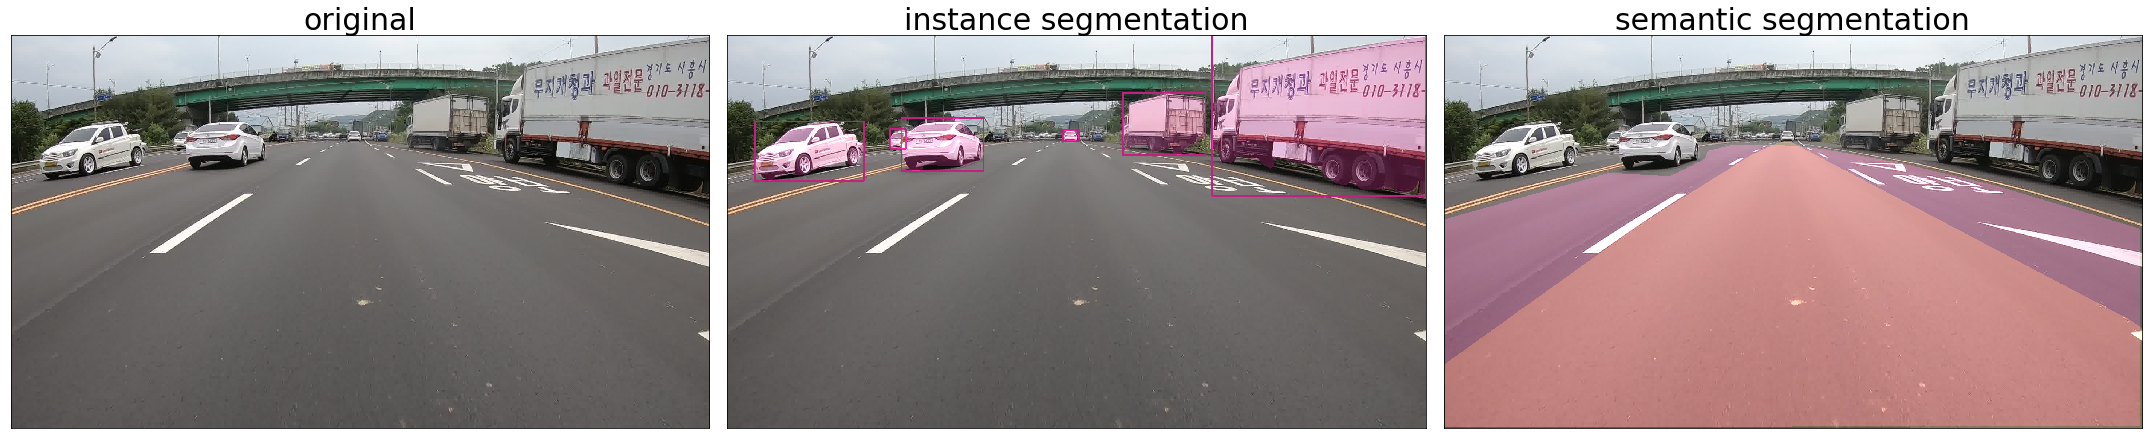

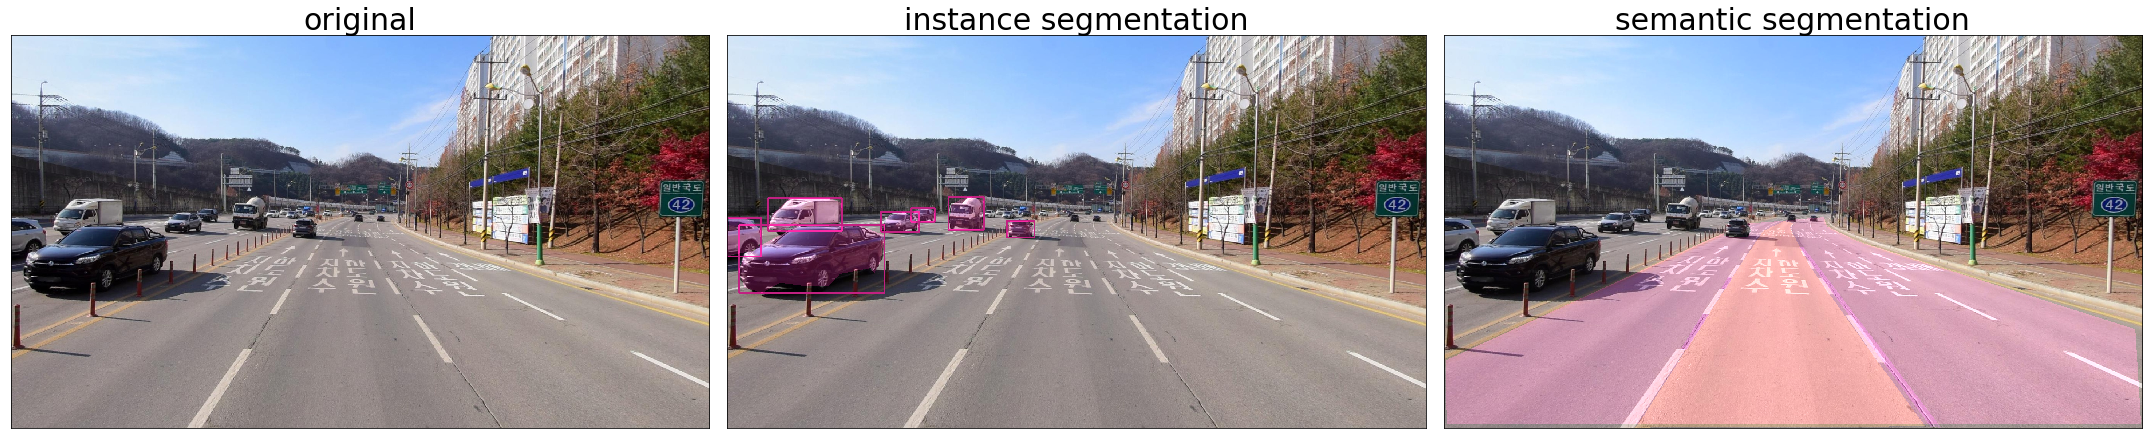

In [6]:
for image, detection, semantic, instance in zip(images, detections, semantics, instances):
    fig = plt.figure(figsize=(30,15))
    ax = fig.add_subplot(1,3,1)
    ax.set_title('original',fontsize=30); ax.set_xticks([]); ax.set_yticks([]);
    ax.imshow(image)

    ax = fig.add_subplot(1,3,2)
    ax.set_title('instance segmentation',fontsize=30); ax.set_xticks([]); ax.set_yticks([]);
    ax.imshow(draw_instances(image, detection, instance))

    ax = fig.add_subplot(1,3,3)
    ax.set_title('semantic segmentation',fontsize=30); ax.set_xticks([]); ax.set_yticks([]);
    ax.imshow(draw_semantics(image, semantic))

    plt.tight_layout()
    plt.show()